In [ ]:
import json
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


Accuracy: 0.8908
Precision: 0.6123
Recall: 0.1970
F1 Score: 0.2981
ROC AUC Score: 0.7939

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      6434
           1       0.61      0.20      0.30       858

    accuracy                           0.89      7292
   macro avg       0.76      0.59      0.62      7292
weighted avg       0.87      0.89      0.87      7292



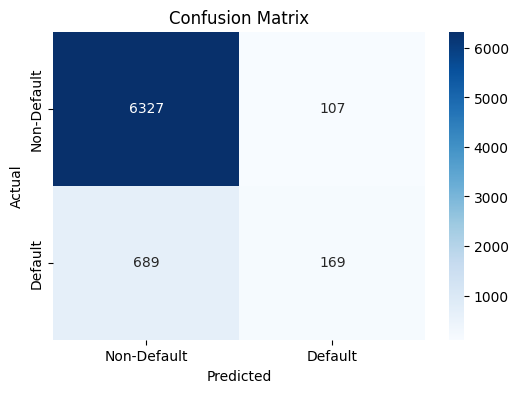

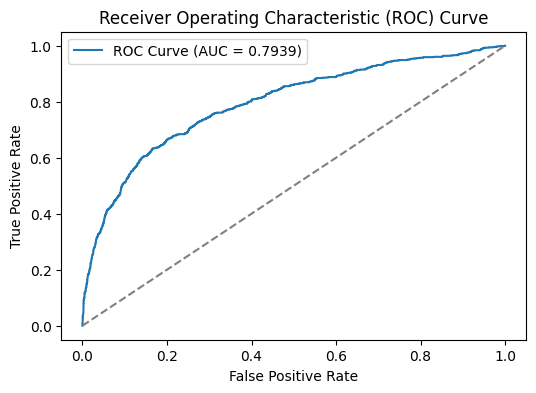

In [ ]:
# Load the Processed Dataset
dataset_path = r"C:\Users\vagel\Desktop\C.R\Dataset\final_credit_risk_dataset.csv"
data = pd.read_csv(dataset_path)

# Separate Features & Target
X = data.drop(columns=["Credit_Status"])
y = data["Credit_Status"]


# Split the dataset into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

json_path = r"C:\Users\vagel\Desktop\CR_Risk Project\rf_best_params.json"

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

# Load best hyperparameters from JSON file
with open(json_path, "r") as f:
    best_params = json.load(f)
    

# Train the final Random Forest model
rf_model = RandomForestClassifier(**best_params,
                                  random_state=42,
                                  n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Default", "Default"], yticklabels=["Non-Default", "Default"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

# **Model Evaluation - Credit Risk Prediction**

## **Key Metrics**
- **Accuracy**: 89.08%  
- **Precision**: 61.23%  
- **Recall**: 19.70%  
- **F1 Score**: 29.81%  
- **ROC AUC Score**: 79.39%  

## **Interpretation of Metrics**
- **Accuracy (89.08%)**  
  - The model correctly classified **89.08% of all instances**.
  - However, accuracy alone is **not enough** due to the **class imbalance** (many more non-defaulters than defaulters).

- **Precision (61.23%)**  
  - Out of all **predicted defaulters**, **61.23% were actual defaulters**.
  - Higher than the previous model, meaning **fewer false positives**.

- **Recall (19.70%)**  
  - Out of all **actual defaulters**, the model **correctly identified only 19.70%**.
  - This is **too low**, meaning the model **misses a large number of real defaulters**.
  - **Low recall = High credit risk** as many actual defaulters are misclassified as non-defaulters.

- **F1 Score (29.81%)**  
  - A **low F1 score** suggests that the trade-off between precision and recall is **still unbalanced**.
  - The model **performs slightly better than the previous one**, but still needs improvements.

- **ROC AUC Score (79.39%)**  
  - Measures how well the model separates **defaulters from non-defaulters**.
  - **79.71% is an improvement**, but recall remains **too low**.


## **Confusion Matrix Interpretation**

- **6327 True Negatives (TN)** → Correctly classified **non-defaulters**.
- **169 True Positives (TP)** → Correctly classified **defaulters**.
- **107 False Positives (FP)** → **Non-defaulters wrongly classified as defaulters**.
- **689 False Negatives (FN)** → **Defaulters wrongly classified as non-defaulters** (**very risky in credit lending**).

**Key Risk**:  
- **646 actual defaulters** were missed, which could lead to **high financial losses**.
- **Model favors precision over recall**, meaning it is **reluctant to classify someone as a defaulter**.


## **Improvements & Next Steps**
### **1. Increase Recall (Catch More Defaulters)**
   - Lower the **classification threshold** from `0.5` (default) to a lower value (e.g., `0.4`).
   - **Use class weighting (`scale_pos_weight` in XGBoost) to penalize missing defaulters.**
   - Apply **SMOTE (Synthetic Minority Over-Sampling Technique)** to balance the dataset.

### **2. Fine-Tune Hyperparameters**
   - Increase **max_depth** and **n_estimators** for better **learning capacity**.
   - Try **L1/L2 regularization** to improve generalization.

### **3. Feature Engineering**
   - Create **new financial indicators** (e.g., **credit utilization ratio, debt-to-income ratio**).
   - Remove **redundant or highly correlated features**.


---

## **Final Thoughts**
- The model is **highly accurate but still fails to detect a significant number of defaulters**.  
- **Precision is good**, meaning **fewer false positives**, but **recall is too low**, which is **dangerous for credit risk assessment**.  
- **Focus should be on boosting recall while maintaining precision** to improve overall risk prediction.  